In [1]:
import os
import sys
import random
import math
import re
import time
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library

# Import Mask RCNN
import utils
import visualize
import model as modellib
from model import log
from dataset import GRADEDataset
from dataset import GRADEConfig
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco
from coco import evaluate_coco
from coco import CocoDataset

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Evaluation
#class InferenceConfig(GRADEConfig):
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    USE_MINI_MASK = False

inference_config = InferenceConfig()
inference_config.display()


model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path = COCO_MODEL_PATH
#model_path = model.find_last()
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

dataset_val = CocoDataset()
#coco = dataset_val.load_coco("/media/ebonetto/WindowsData/coco/coco2yolo/coco", "val", year=2017, return_coco=True, class_ids=[1], auto_download=False)
coco = dataset_val.load_coco("/media/ebonetto/WindowsData/tum_valid", "val", year=2017, return_coco=True, class_ids=[1], auto_download=False)

2023-02-03 11:58:35.011720: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ebonetto/tensorflow/lib/python3.8/site-packages/cv2/../../lib64:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/home/ebonetto/local/lib:/is/software/nvidia/cudnn-8.0.2-cu10.1/lib64:/is/software/nvidia/cuda-10.1/lib64:/is/software/nvidia/cuda-10.1/lib64
2023-02-03 11:58:35.011741: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

2023-02-03 11:58:40.341630: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-03 11:58:40.342925: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-03 11:58:40.420124: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: Quadro RTX 5000 computeCapability: 7.5
coreClock: 1.815GHz coreCount: 48 deviceMemorySize: 15.74GiB deviceMemoryBandwidth: 417.29GiB/s
2023-02-03 11:58:40.420452: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ebonetto/tensorflow/lib/python3.8/site-packages/cv2/../../lib64:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/home/ebonetto/local/lib:/is/software/nvidia/cudnn-8.0.2-cu10.1/li

Loading weights from  /media/ebonetto/WindowsData/Mask-RCNN-TF2.7/mask_rcnn_coco.h5
Check loaded layers...
by name


2023-02-03 11:58:41.978815: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 11:58:41.979699: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-03 11:58:41.979724: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-02-03 11:58:41.979729: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      
2023-02-03 11:58:42.244393: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2023-02-03 11:58:42.370304: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


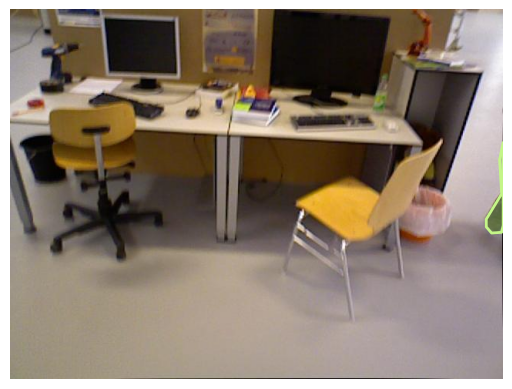

In [42]:
import skimage.io as io
import matplotlib.pyplot as plt
imgIds = coco.getImgIds(catIds=[1])
index = np.random.randint(0, len(imgIds))
img = coco.loadImgs(imgIds[index])[0] # Load images with specified ids.
i = io.imread("/media/ebonetto/WindowsData/tum_valid/val2017/"+img['file_name'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=[1], iscrowd=None)
anns = coco.loadAnns(annIds)
plt.axis('off')
plt.imshow(i)
coco.showAnns(anns)
plt.show()
